In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import ipywidgets as widgets
from IPython.display import display
from enhancement_analysis import *

%matplotlib inline

# Sample

# some_data = analysis.processAll(folder_path=string,start_num,stop_num,
                                # skips=list,initial_blocked,alternate,
                                # start_stop_YbOH=list,start_stop_Yb=list,indep_var=list/array)
         
# Can also use analysis.getODsfromRaw(folder_path,start_num,stop_num,skips,initial_blocked,alternate)
# just use the returned list as an argument for analysis.integrateODs

In [20]:
folder = '20181221'
start = 316
stop = 360
skips = []
dataset = calculateODsSingleChannel(folder,start,stop,skips)

#data = analysis.processScan(dataset,[0,5])
#int_YbOH = data[0]
#time = data[1]
#ODs = data[2]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

45
45
0.0
6099.0
2.341958522796631
6120.7802142620085
4.683830738067627
6142.559625864029
7.025789260864258
6164.339840126037
9.367660999298096
6186.119247293473
11.709532737731934
6207.898654460907
14.051491737365723
6229.678873157502
16.39336347579956
6251.458280324936
18.73532199859619
6273.238494586944
21.07719373703003
6295.01790175438
23.419065475463867
6316.797308921814
25.761024951934814
6338.577532052994
28.102895736694336
6360.356930351258
30.444854736328125
6382.137149047851
32.78672647476196
6403.916556215287
35.128684997558594
6425.696770477295
37.47055721282959
6447.476182079316
39.81242895126343
6469.25558924675
42.15438795089722
6491.0358079433445
44.496259689331055
6512.815215110779
46.838218212127686
6534.595429372787
49.18008995056152
6556.3748365402225
51.52196168899536
6578.154243707657
53.86392021179199
6599.934457969665
56.20579290390015
6621.713874006271
58.54775094985962
6643.494083833694
60.88962268829346
6665.2734910011295
63.23149490356445
6687.052902603149


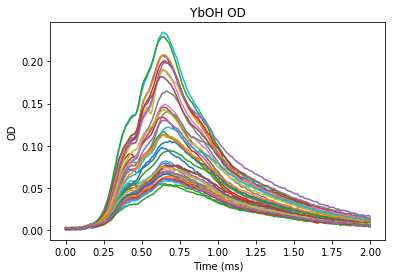

In [21]:
data = processScan(dataset,[0,2])
int_YbOH = data[0]
time = data[1]
speed = 9.3 #MHz sec
start = 6099 #MHz
if speed < 0:
    reorder = True
else:
    reorder = False
freq = []
for point in time:
    value = start + point*speed
    print(point)
    print(value)
    freq.append(value)
#if reorder:
#    freq = freq[::-1]
ODs = data[2]

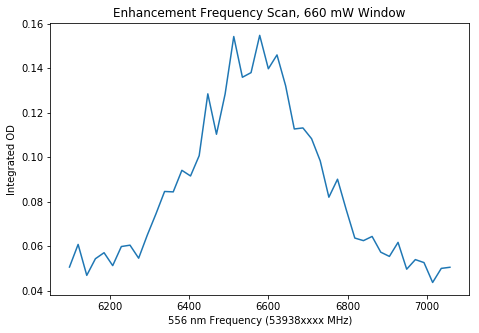

In [23]:
plt.figure(figsize=(7.5,5))
plt.title('Enhancement Frequency Scan, 660 mW Window')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated OD')
plt.plot(freq,int_YbOH);

In [24]:
scan_1 = int_YbOH
freq_1 = freq

In [64]:
scan_2 = int_YbOH
freq_2 = freq

<IPython.core.display.Javascript object>


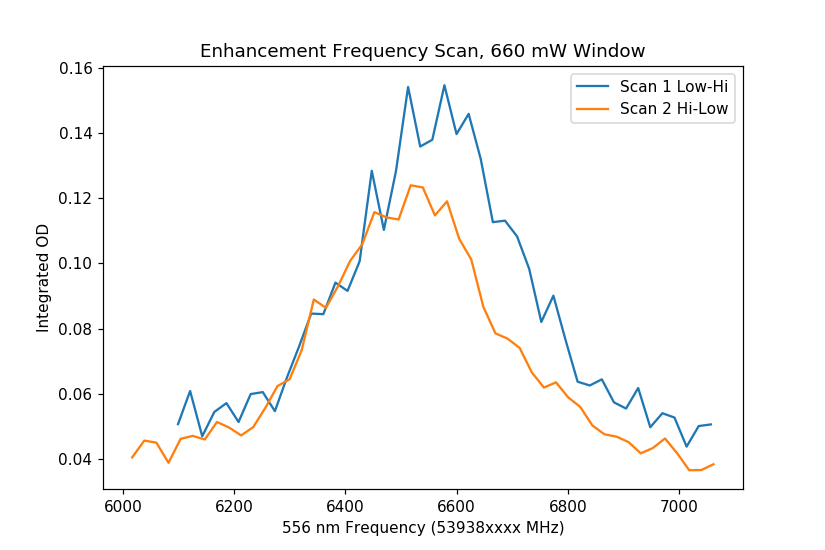

In [68]:
plt.figure(figsize=(7.5,5))
plt.title('Enhancement Frequency Scan, 660 mW Window')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated OD')
plt.plot(freq_1,scan_1,label='Scan 1 Low-Hi')
plt.plot(freq_2,scan_2, label = 'Scan 2 Hi-Low')
plt.legend(loc='best');

Standard Dev =  138.7216081300157
Covariance matrix = 
 [[ 3.27455801e+01  1.58730481e-02 -6.73720929e-05 -7.74260837e-03]
 [ 1.58730481e-02  1.66509223e+01  5.84585617e-06 -7.92164247e-06]
 [-6.73720929e-05  5.84585617e-06  7.55287811e-06 -2.66253775e-06]
 [-7.74260837e-03 -7.92164247e-06 -2.66253775e-06  3.72549758e-06]]
Fit error =  [5.722e+00 4.081e+00 3.000e-03 2.000e-03]
FIT PARAMS =  [1.387220e+02 6.564982e+03 9.300000e-02 5.100000e-02]



Mean = 6564.982 +/- 4.081 MHz, StDev = 138.722 +/- 5.722 MHz


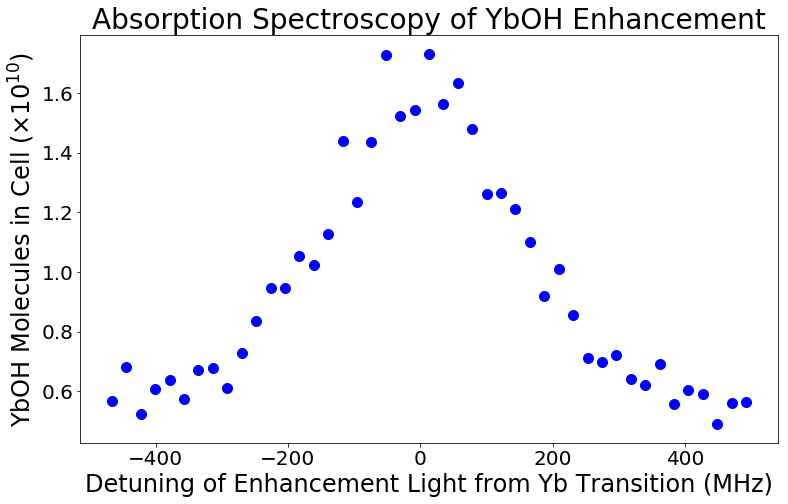

In [25]:
params_1 = fitGaussian(freq_1, scan_1,guess=[100,6500,0.16,0],sigma=None)
plt.figure(figsize=(12.5,7.5))
plt.plot(np.array(freq_1)-params_1[1],np.array(scan_1)*1.12*10,'bo',markersize=10)
#plt.plot(freq_1,analysis.gaussian(np.array(freq_1),*params_1),label='Fit, StDev={} MHz'.format(params_1[0]))
plt.title('Absorption Spectroscopy of YbOH Enhancement',fontsize=28)
plt.xlabel('Detuning of Enhancement Light from Yb Transition (MHz)',fontsize=24)
plt.ylabel(r'YbOH Molecules in Cell ($\times 10^{10}$)',fontsize=24)
plt.xticks(size = 20)
plt.yticks(size = 20);
#plt.legend(loc='best');


Standard Dev =  138.72083530428174
Covariance matrix = 
 [[ 3.27450923e+01  1.58658965e-02 -6.74842710e-05 -7.74245626e-03]
 [ 1.58658965e-02  1.66508159e+01  5.84867644e-06 -7.92030705e-06]
 [-6.74842710e-05  5.84867644e-06  7.55287884e-06 -2.66249656e-06]
 [-7.74245626e-03 -7.92030705e-06 -2.66249656e-06  3.72544243e-06]]
Fit error =  [5.722e+00 4.081e+00 3.000e-03 2.000e-03]
FIT PARAMS =  [1.38721e+02 1.00000e-03 9.30000e-02 5.10000e-02]



Mean = 0.001 +/- 4.081 MHz, StDev = 138.721 +/- 5.722 MHz


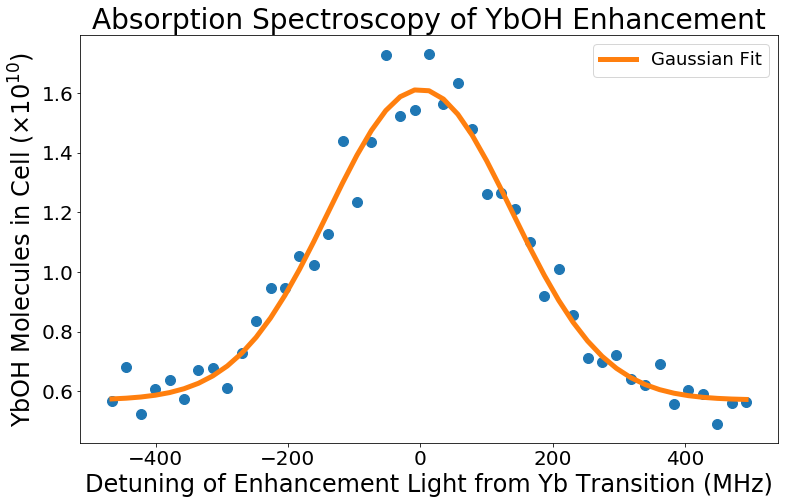

In [36]:
params_2 = fitGaussian(np.array(freq_1)-params_1[1], scan_1,guess=[100,0,0.16,0],sigma=None)
plt.figure(figsize=(12.5,7.5))
plt.plot(np.array(freq_1)-params_1[1],np.array(scan_1)*1.12*10,'.',markersize=20)
plt.plot(np.array(freq_1)-params_1[1],11.2*gaussian(np.array(freq_1)-params_1[1],*params_2),label=r'Gaussian Fit'.format(params_1[0]),linewidth=5)
plt.title('Absorption Spectroscopy of YbOH Enhancement',fontsize=28)
plt.xlabel('Detuning of Enhancement Light from Yb Transition (MHz)',fontsize=24)
plt.ylabel(r'YbOH Molecules in Cell ($\times 10^{10}$)',fontsize=24)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc='best',fontsize=18);


Standard Dev =  145.225919167
Covariance matrix = 
 [[  1.60286000e+01   7.83955412e-03  -3.26495313e-04  -2.80023541e-03]
 [  7.83955412e-03   8.68006961e+00   2.24628847e-06  -3.07451627e-06]
 [ -3.26495313e-04   2.24628847e-06   2.40298713e-06  -7.60130166e-07]
 [ -2.80023541e-03  -3.07451627e-06  -7.60130166e-07   1.06719489e-06]]
Fit error =  [  4.00400000e+00   2.94600000e+00   2.00000000e-03   1.00000000e-03]
FIT PARAMS =  [  1.45226000e+02   6.51641600e+03   7.80000000e-02   4.20000000e-02]



Mean = 6516.416 +/- 2.946 MHz, StDev = 145.226 +/- 4.004 MHz


<IPython.core.display.Javascript object>


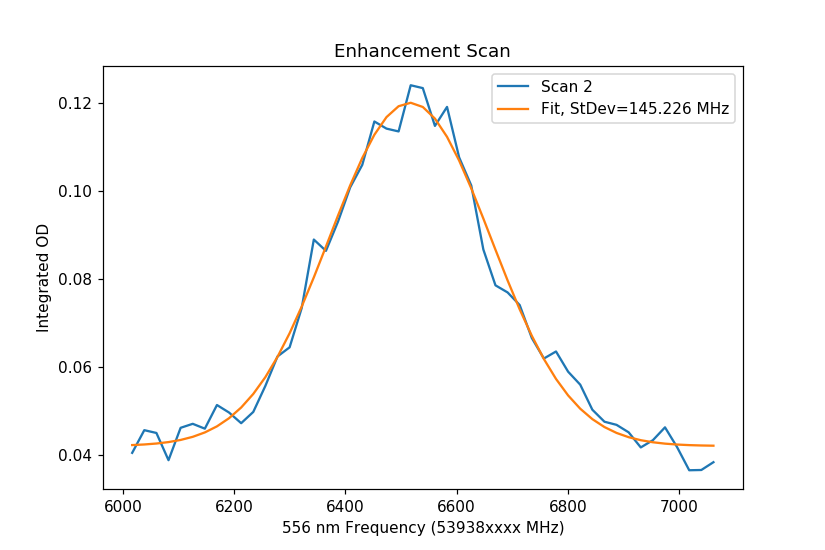

In [69]:
params_2 = analysis.fitGaussian(freq_2, scan_2,guess=[100,6500,0.16,0],sigma=None)
plt.figure(figsize=(7.5,5))
plt.plot(freq_2,scan_2,label='Scan 2')
plt.plot(freq_2,analysis.gaussian(np.array(freq_2),*params_2),label='Fit, StDev={} MHz'.format(params_2[0]))
plt.title('Enhancement Scan')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated OD')
plt.legend(loc='best');

In [30]:
folder = '20181221'
start = 361
stop = 409
skips = []
channel = 2
dataset = analysis.calculateODsSingleChannel(folder,start,stop,skips,channel)

A Jupyter Widget

<IPython.core.display.Javascript object>


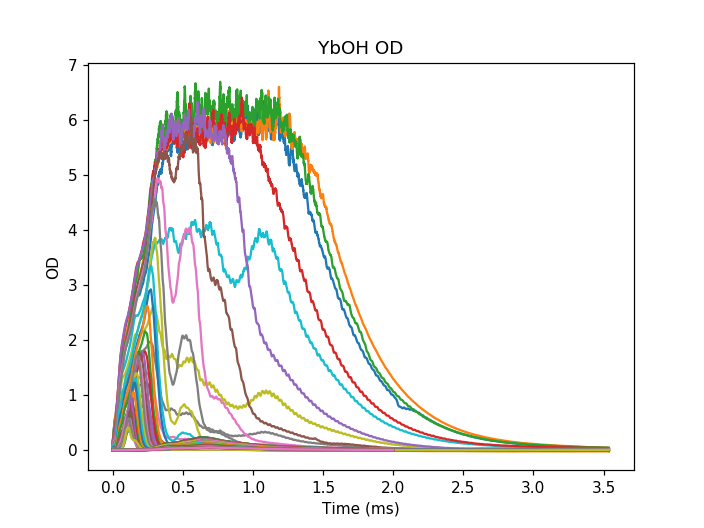

A Jupyter Widget

49
49
0.0
7062.0
2.34195899963
7040.2197813
4.68383026123
7018.44037857
7.02578926086
6996.66015987
9.36766147614
6974.88074827
11.7095327377
6953.10134554
14.0514917374
6931.32112684
16.393362999
6909.54172411
18.7353219986
6887.76150541
21.0771942139
6865.98209381
23.4190659523
6844.20268664
25.7610244751
6822.42247238
28.1028966904
6800.64306078
30.4448552132
6778.86284652
32.7867269516
6757.08343935
35.1285982132
6735.30403662
37.4705572128
6713.52381792
39.8124294281
6691.74440632
42.1543874741
6669.96419649
44.4962601662
6648.18478045
46.8382182121
6626.40457063
49.1800899506
6604.62516346
51.5219621658
6582.84575186
53.8639202118
6561.06554203
56.2057924271
6539.28613043
58.5477509499
6517.50591617
60.8896231651
6495.72650456
63.2314949036
6473.9470974
65.5734529495
6452.16688757
67.9153251648
6430.38747597
70.2572832108
6408.60726614
72.599155426
6386.82785454
74.9411139488
6365.04764028
77.2829861641
6343.26822867
79.6248579025
6321.48882151
81.9668164253
6299.70860724
84.3086

In [31]:
data = analysis.processScan(dataset,[0,5])
integrated = data[0]
time = data[1]
speed = -9.3 #MHz sec
start = 7062 #MHz
if speed < 0:
    reorder = True
else:
    reorder = False
freq = []
for point in time:
    value = start + point*speed
    print(point)
    print(value)
    freq.append(value)
#if reorder:
#    freq = freq[::-1]
ODs = data[2]

In [32]:
freq_2 = freq
scan_2 = integrated

<IPython.core.display.Javascript object>


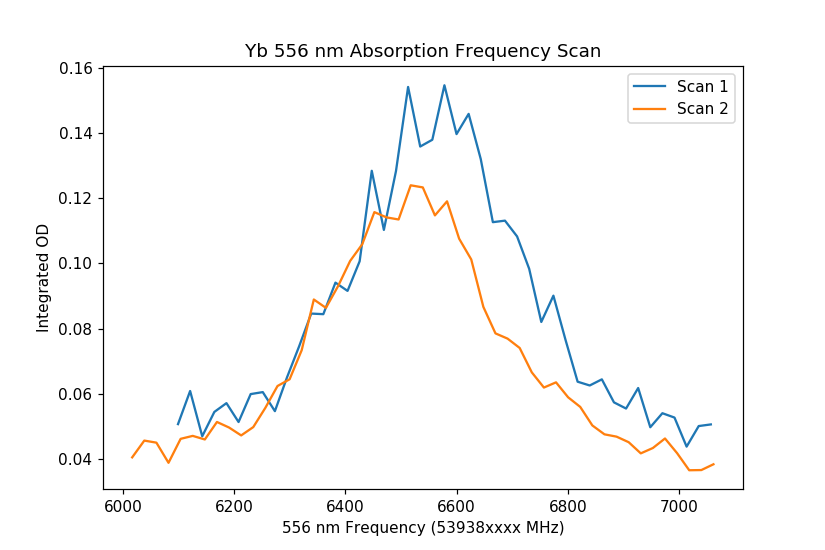

Standard Dev =  138.721607848
Covariance matrix = 
 [[  3.27455805e+01   1.58730852e-02  -6.73721897e-05  -7.74260845e-03]
 [  1.58730852e-02   1.66509223e+01   5.84586044e-06  -7.92165295e-06]
 [ -6.73721897e-05   5.84586044e-06   7.55287811e-06  -2.66253772e-06]
 [ -7.74260845e-03  -7.92165295e-06  -2.66253772e-06   3.72549759e-06]]
Fit error =  [  5.72200000e+00   4.08100000e+00   3.00000000e-03   2.00000000e-03]
FIT PARAMS =  [  1.38722000e+02   6.56498200e+03   9.30000000e-02   5.10000000e-02]



Mean = 6564.982 +/- 4.081 MHz, StDev = 138.722 +/- 5.722 MHz


In [75]:
plt.figure(figsize=(7.5,5))
plt.title('Yb 556 nm Absorption Frequency Scan')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated OD')
plt.plot(freq_1,scan_1,label='Scan 1')
plt.plot(freq_2,scan_2,label='Scan 2')
plt.legend(loc='best');
params_2 = analysis.fitGaussian(freq_1, scan_1,guess=[100,6500,0.16,0],sigma=None)

<IPython.core.display.Javascript object>


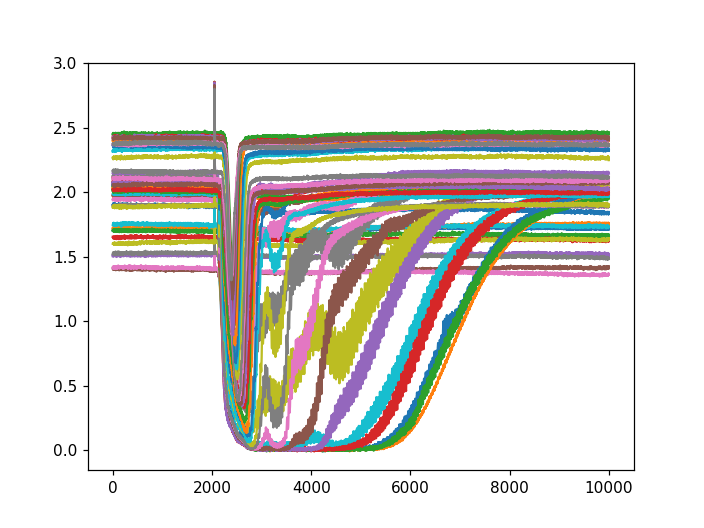

In [19]:
plt.figure()
for i in range(409-361):
    sample = analysis.file2dataset('20181221',i+361)
    plt.plot(sample[0][1])

In [71]:
np.sqrt(8*np.log(2))

2.3548200450309493

In [13]:
folder = '20190212'
start = 239
stop = 403
skips = []
dataset = calculateSeriesODFromRaw(folder,start,stop,skips)

FloatProgress(value=0.0, max=1.0)

In [31]:
print(dataset[-1][0][-2]-dataset[-1][-1][-2])
print('start = ',539386291,'MHz')
print('stop = 539,386914 MHz')

-114.95606470108032
start =  539386291 MHz
stop = 539,386914 MHz


FloatProgress(value=0.0, max=1.0)

165
165
0.0
6291.0
0.41204214096069336
6294.797370618617
0.8240833282470703
6298.594732448194
1.2361254692077637
6302.392103066812
1.6481666564941406
6306.189464896388
2.060122489929199
6309.986040106892
2.472163200378418
6313.783397541949
2.8842053413391113
6317.580768160566
3.2962470054626465
6321.378134384663
3.7082881927490234
6325.17549621424
4.120330333709717
6328.972866832857
4.532371520996094
6332.770228662434
4.944326877593994
6336.566799478418
5.356368064880371
6340.364161307995
5.7684102058410645
6344.161531926612
6.180451393127441
6347.958893756189
6.592493057250977
6351.756259980287
7.004534721374512
6355.553626204383
7.416576385498047
6359.350992428481
7.828531265258789
6363.147558849944
8.240573406219482
6366.944929468561
8.65261459350586
6370.742291298138
9.064656257629395
6374.539657522236
9.476698398590088
6378.337028140852
9.888739585876465
6382.13438997043
10.30078125
6385.931756194526
10.712736129760742
6389.728322615991
11.124778270721436
6393.525693234607
11.5368

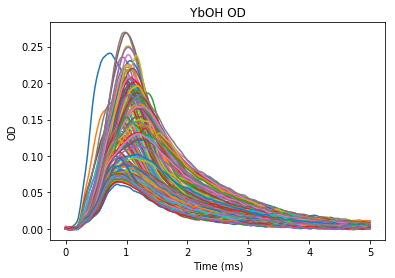

In [25]:
#data = analysis.processScan(dataset,[0,5])
#int_YbOH = data[0]
#time = data[1]
#ODs = data[2]

data = processScan(dataset,[0,5])
int_YbOH = data[0]
time = data[2]
deltat = 67.6 #sec
start = 6291 #MHz
stop = 6914 #MHz
speed = (stop-start)/deltat
if speed < 0:
    reorder = True
else:
    reorder = False
freq = []
for point in time:
    value = start + point*speed
    print(point)
    print(value)
    freq.append(value)
#if reorder:
#    freq = freq[::-1]
ODs = data[2]

In [26]:
scan1 = int_YbOH

In [27]:
freq1 = freq

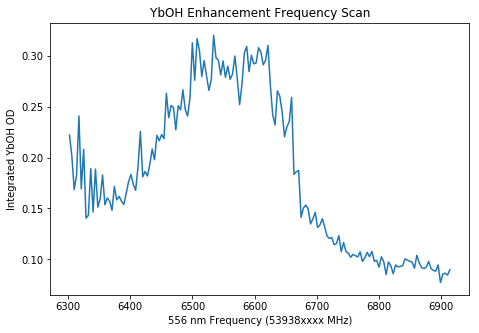

In [29]:
plt.figure(figsize=(7.5,5))
plt.title('YbOH Enhancement Frequency Scan')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated YbOH OD')
plt.plot(freq1[3:],scan1[3:])


In [30]:
folder = '20190216'
start = 41
stop = 320
skips = []
dataset = calculateSeriesODFromRaw(folder,start,stop,skips)

FloatProgress(value=0.0, max=1.0)

In [32]:
print(dataset[-1][0][-2]-dataset[-1][-1][-2])

-114.95606470108032


FloatProgress(value=0.0, max=1.0)

280
280
0.0
7010.0
0.41204214096069336
7006.990300883417
0.8240838050842285
7003.98060524982
1.2361254692077637
7000.970909616221
1.6481671333312988
6997.961213982623
2.060208320617676
6994.95152183201
2.472163677215576
6991.942456618599
2.8842053413391113
6988.932760985002
3.2962470054626465
6985.923065351403
3.7082881927490234
6982.9133732007895
4.120330333709717
6979.9036740842075
4.532371520996094
6976.893981933594
4.944413185119629
6973.884286299995
5.356368064880371
6970.87522456957
5.7684102058410645
6967.865525452987
6.1804518699646
6964.855829819389
6.592493057250977
6961.846137668776
7.00453519821167
6958.836438552193
7.416576385498047
6955.82674640158
7.82861852645874
6952.817047284997
8.240573406219482
6949.807985554571
8.652615070343018
6946.798289920973
9.064656257629395
6943.788597770359
9.476698398590088
6940.778898653777
9.888739585876465
6937.769206503163
10.30078125
6934.759510869565
10.712823390960693
6931.749811752983
11.124778270721436
6928.740750022556
11.5368199

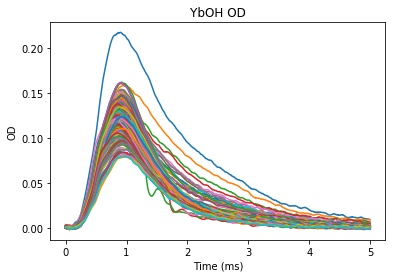

In [33]:
#data = analysis.processScan(dataset,[0,5])
#int_YbOH = data[0]
#time = data[1]
#ODs = data[2]

data = processScan(dataset,[0,5])
scan2 = data[0]
time = data[2]
deltat = 115 #sec
start = 7010 #MHz
stop = 6170 #MHz
speed = (stop-start)/deltat
if speed < 0:
    reorder = True
else:
    reorder = False
freq = []
for point in time:
    value = start + point*speed
    print(point)
    print(value)
    freq.append(value)
#if reorder:
#    freq = freq[::-1]
ODs = data[2]
freq2 = freq

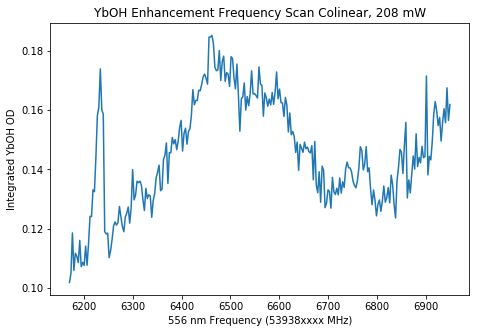

In [38]:
plt.figure(figsize=(7.5,5))
plt.title('YbOH Enhancement Frequency Scan Colinear, 208 mW')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated YbOH OD')
plt.plot(freq2[20:],scan2[20:])

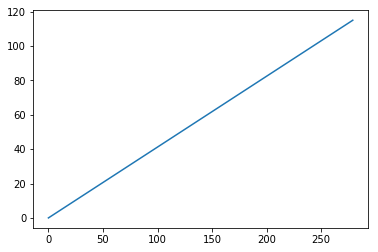

In [39]:
plt.plot(time)

In [41]:
folder = '20190216'
start = 403
stop = 530
skips = []
dataset = calculateSeriesODFromRaw(folder,start,stop,skips)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

128
128
52.3276424407959  sec
0.0
6159.0
0.41204214096069336
6166.645919063247
0.8240838050842285
6174.291829278228
1.2361254692077637
6181.937739493209
1.6481671333312988
6189.583649708189
2.060122489929199
6197.2279583870895
2.472163677215576
6204.873859753805
2.8842053413391113
6212.519769968786
3.2962474822998047
6220.165689032033
3.7082881927490234
6227.8115815504825
4.120330333709717
6235.457500613729
4.532371997833252
6243.1034108287095
4.944327354431152
6250.74771950761
5.356368064880371
6258.39361202606
5.7684102058410645
6266.039531089306
6.1804518699646
6273.685441304287
6.592493057250977
6281.331342671003
7.00453519821167
6288.977261734249
7.416576385498047
6296.623163100964
7.828531742095947
6304.2674717798645
8.240573406219482
6311.913381994846
8.652615547180176
6319.559301058092
9.064656257629395
6327.205193576542
9.476698398590088
6334.851112639789
9.888740062713623
6342.497022854769
10.300695419311523
6350.1413315336695
10.712736129760742
6357.787224052119
11.124778270

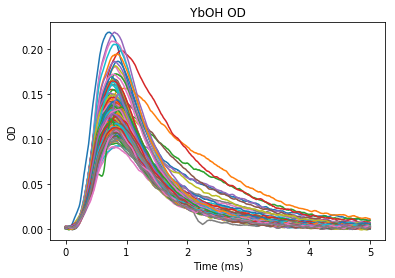

In [42]:
#data = analysis.processScan(dataset,[0,5])
#int_YbOH = data[0]
#time = data[1]
#ODs = data[2]

data = processScan(dataset,[0,5])
scan3 = data[0]
time = data[2]
deltat = time[-1] #sec
print(deltat, ' sec')
start = 6159 #MHz
stop = 7130 #MHz
speed = (stop-start)/deltat
if speed < 0:
    reorder = True
else:
    reorder = False
freq = []
for point in time:
    value = start + point*speed
    print(point)
    print(value)
    freq.append(value)
#if reorder:
#    freq = freq[::-1]
ODs = data[2]
freq3 = freq

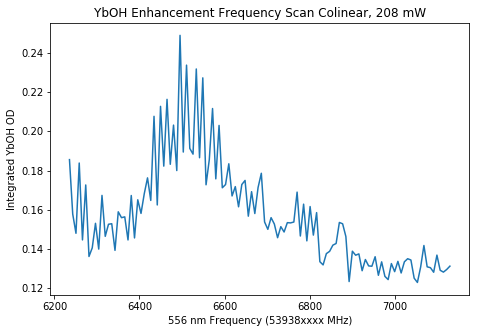

In [46]:
plt.figure(figsize=(7.5,5))
plt.title('YbOH Enhancement Frequency Scan Colinear, 208 mW')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated YbOH OD')
plt.plot(freq3[10:],scan3[10:])

Standard Dev =  107.0540782362983
Covariance matrix = 
 [[ 1.07644141e+02  2.92271869e-01 -1.00130505e-02 -1.43505559e-02]
 [ 2.92271869e-01  7.25171188e+01  1.27225942e-04 -1.49946450e-04]
 [-1.00130505e-02  1.27225942e-04  2.03391796e-05 -4.28490613e-06]
 [-1.43505559e-02 -1.49946450e-04 -4.28490613e-06  5.89380948e-06]]
Fit error =  [1.0375e+01 8.5160e+00 5.0000e-03 2.0000e-03]
FIT PARAMS =  [1.070540e+02 6.521344e+03 6.000000e-02 1.410000e-01]



Mean = 6521.344 +/- 8.516 MHz, StDev = 107.054 +/- 10.375 MHz


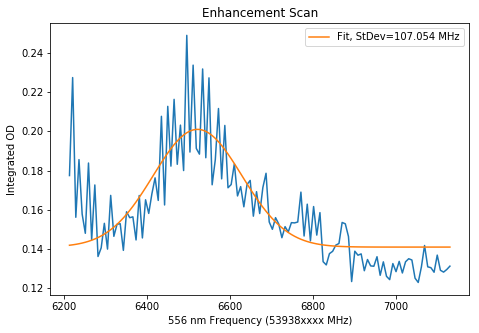

In [69]:
params3 = fitGaussian(freq3[7:], scan3[7:],guess=[100,6500,0.22,0],sigma=None)
plt.figure(figsize=(7.5,5))
plt.plot(freq3[7:],scan3[7:])
plt.plot(freq3[7:],gaussian(np.array(freq3[7:]),*params3),label='Fit, StDev={} MHz'.format(params3[0]))
plt.title('Enhancement Scan')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated OD')
plt.legend(loc='best');

In [47]:
folder = '20190216'
start = 533
stop = 678
skips = []
dataset = calculateSeriesODFromRaw(folder,start,stop,skips)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

146
146
59.744131088256836  sec
0.0
7175.0
0.4119548797607422
7167.3530905323605
0.8239970207214355
7159.704561279331
1.2360377311706543
7152.0560585801595
1.6480803489685059
7144.407520475843
2.060121536254883
7136.7590089253845
2.4721627235412598
7129.110497374927
2.884204864501953
7121.4619681218965
3.2961602210998535
7113.815049802972
3.7082014083862305
7106.166538252513
4.120243072509766
7098.51801785077
4.532285213470459
7090.869488597739
4.944325923919678
7083.220985898568
5.356367588043213
7075.572465496824
5.768322944641113
7067.925547177899
6.180365085601807
7060.277017924868
6.592405796051025
7052.628515225697
7.004447937011719
7044.979985972666
7.416489601135254
7037.331465570923
7.828530788421631
7029.682954020465
8.240572929382324
7022.034424767435
8.652527809143066
7014.387515299795
9.064569473266602
7006.738994898052
9.476610660552979
6999.090483347594
9.88865327835083
6991.441945243278
10.300693988800049
6983.793442544105
10.712735652923584
6976.144922142362
11.1247777

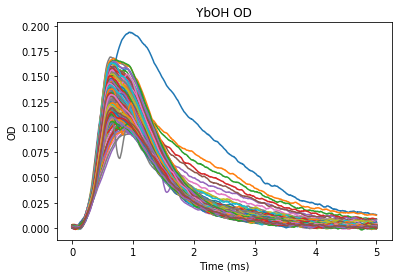

In [48]:
#data = analysis.processScan(dataset,[0,5])
#int_YbOH = data[0]
#time = data[1]
#ODs = data[2]

data = processScan(dataset,[0,5])
scan4 = data[0]
time = data[2]
deltat = time[-1] #sec
print(deltat, ' sec')
start = 7175 #MHz
stop = 6066 #MHz
speed = (stop-start)/deltat
if speed < 0:
    reorder = True
else:
    reorder = False
freq = []
for point in time:
    value = start + point*speed
    print(point)
    print(value)
    freq.append(value)
#if reorder:
#    freq = freq[::-1]
ODs = data[2]
freq4 = freq

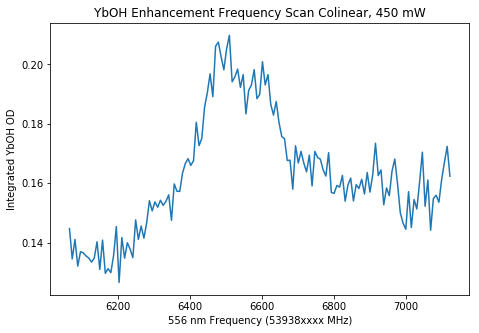

In [53]:
plt.figure(figsize=(7.5,5))
plt.title('YbOH Enhancement Frequency Scan Colinear, 450 mW')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated YbOH OD')
plt.plot(freq4[7:],scan4[7:])

Standard Dev =  111.35813082301586
Covariance matrix = 
 [[ 5.53308388e+01  1.02146334e-03 -5.07856522e-03 -5.17742467e-03]
 [ 1.02146334e-03  3.90002852e+01  2.28410768e-07 -3.24109007e-07]
 [-5.07856522e-03  2.28410768e-07  6.69786399e-06 -1.16099527e-06]
 [-5.17742467e-03 -3.24109007e-07 -1.16099527e-06  1.64144448e-06]]
Fit error =  [7.438e+00 6.245e+00 3.000e-03 1.000e-03]
FIT PARAMS =  [1.113580e+02 6.545882e+03 5.000000e-02 1.500000e-01]



Mean = 6545.882 +/- 6.245 MHz, StDev = 111.358 +/- 7.438 MHz


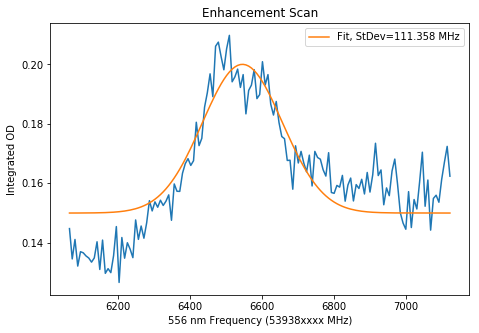

In [68]:
params4 = fitGaussian(freq4[7:], scan4[7:],guess=[100,6500,0.22,0],sigma=None)
plt.figure(figsize=(7.5,5))
plt.plot(freq4[7:],scan4[7:])
plt.plot(freq4[7:],gaussian(np.array(freq4[7:]),*params4),label='Fit, StDev={} MHz'.format(params4[0]))
plt.title('Enhancement Scan')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated OD')
plt.legend(loc='best');

In [50]:
folder = '20190216'
start = 679
stop = 770
skips = []
dataset = calculateSeriesODFromRaw(folder,start,stop,skips)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

92
92
63.76976680755615  sec
0.0
6036.0
0.7007908821105957
6049.044406757446
1.4014954566955566
6062.08720700074
2.102285385131836
6075.131596006649
2.8030753135681152
6088.175985012558
3.503779888153076
6101.218785255851
4.2045698165893555
6114.26317426176
4.905360698699951
6127.307581019207
5.6061506271362305
6140.351970025115
6.306855201721191
6153.394770268409
7.007645130157471
6166.439159274318
7.708436012268066
6179.483566031764
8.409225940704346
6192.527955037674
9.109930038452148
6205.5707464051975
9.810720443725586
6218.615144286876
10.511510848999023
6231.659542168553
11.212214946746826
6244.702333536077
11.913005352020264
6257.746731417756
12.613795280456543
6270.791120423664
13.314586162567139
6283.835527181111
14.015290260314941
6296.878318548635
14.716080665588379
6309.922716430313
15.416870594024658
6322.9671054362225
16.11757469177246
6336.009896803746
16.818365573883057
6349.054303561194
17.519155979156494
6362.098701442871
18.219945907592773
6375.14309044878
18.920650

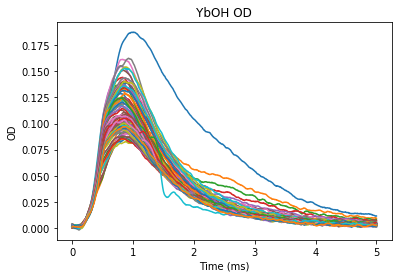

In [57]:
#data = analysis.processScan(dataset,[0,5])
#int_YbOH = data[0]
#time = data[1]
#ODs = data[2]

data = processScan(dataset,[0,5])
scan5 = data[0]
time = data[2]
deltat = time[-1] #sec
print(deltat, ' sec')
start = 6036 #MHz
stop = 7223 #MHz
speed = (stop-start)/deltat
if speed < 0:
    reorder = True
else:
    reorder = False
freq = []
for point in time:
    value = start + point*speed
    print(point)
    print(value)
    freq.append(value)
#if reorder:
#    freq = freq[::-1]
ODs = data[2]
freq5 = freq

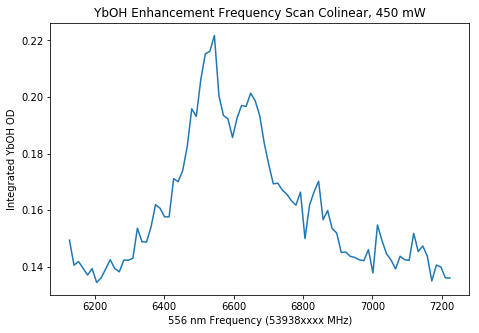

In [62]:
plt.figure(figsize=(7.5,5))
plt.title('YbOH Enhancement Frequency Scan Colinear, 450 mW')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated YbOH OD')
plt.plot(freq5[7:],scan5[7:])


Standard Dev =  128.24522448784057
Covariance matrix = 
 [[ 4.30797122e+01  1.77137617e-02 -3.17987950e-03 -5.04108765e-03]
 [ 1.77137617e-02  2.82489530e+01  4.52273513e-06 -6.20071904e-06]
 [-3.17987950e-03  4.52273513e-06  5.71625814e-06 -1.21693820e-06]
 [-5.04108765e-03 -6.20071904e-06 -1.21693820e-06  1.71369977e-06]]
Fit error =  [6.564e+00 5.315e+00 2.000e-03 1.000e-03]
FIT PARAMS =  [1.282450e+02 6.581636e+03 6.100000e-02 1.420000e-01]



Mean = 6581.636 +/- 5.315 MHz, StDev = 128.245 +/- 6.564 MHz


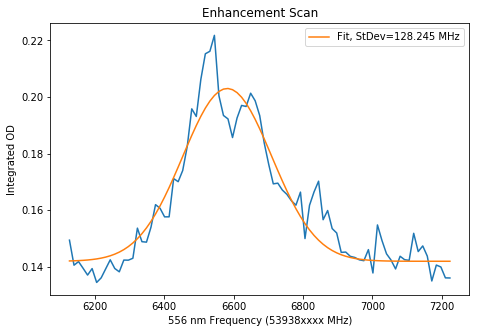

In [66]:
params5 = fitGaussian(freq5[7:], scan5[7:],guess=[100,6500,0.22,0],sigma=None)
plt.figure(figsize=(7.5,5))
plt.plot(freq5[7:],scan5[7:])
plt.plot(freq5[7:],gaussian(np.array(freq5[7:]),*params5),label='Fit, StDev={} MHz'.format(params5[0]))
plt.title('Enhancement Scan')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated OD')
plt.legend(loc='best');

In [2]:
folder = '20190220'
start = 439
stop = 499
skips = []
dataset = calculateSeriesODFromRaw(folder,start,stop,skips)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

61
61
42.04604196548462  sec
0.0
7010.0
0.7007904052734375
6996.999572598011
1.401580810546875
6983.999145196021
2.1022849082946777
6971.000318892895
2.803074836730957
6957.999900336756
3.5038652420043945
6944.999472934766
4.204569339752197
6932.00064663164
4.905360221862793
6919.000210383801
5.606150150299072
6905.999791827661
6.30694055557251
6892.999364425672
7.0076446533203125
6880.0005381225465
7.708434581756592
6867.000119566407
8.409225463867188
6853.999683318568
9.110015869140625
6840.9992559165785
9.810719966888428
6828.000429613452
10.511509895324707
6815.000011057313
11.212300777435303
6801.999574809473
11.913005352020264
6789.000739660497
12.613795280456543
6776.000321104358
13.314585208892822
6762.999902548218
14.015376091003418
6749.999466300379
14.71608018875122
6737.000639997253
15.416870594024658
6724.000212595263
16.117660522460938
6710.999794039124
16.818450927734375
6697.999366637135
17.519155502319336
6685.000531488158
18.219945430755615
6672.000112932019
18.920735

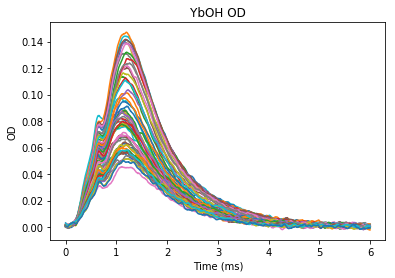

In [5]:
#data = analysis.processScan(dataset,[0,5])
#int_YbOH = data[0]
#time = data[1]
#ODs = data[2]

data = processScan(dataset,[0,6])
scan2 = data[0]
time = data[2]
deltat = time[-1] #sec
print(deltat, ' sec')
start = 7010 #MHz
stop = 6230 #MHz
speed = (stop-start)/deltat
if speed < 0:
    reorder = True
else:
    reorder = False
freq = []
for point in time:
    value = start + point*speed
    print(point)
    print(value)
    freq.append(value)
#if reorder:
#    freq = freq[::-1]
freq2 = freq

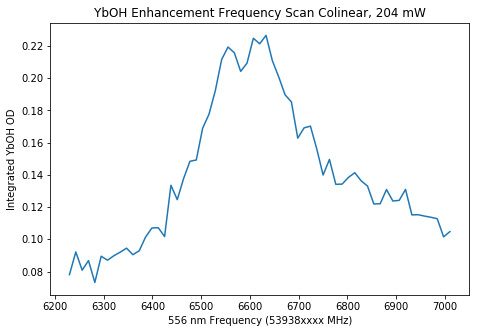

In [6]:
plt.figure(figsize=(7.5,5))
plt.title('YbOH Enhancement Frequency Scan Colinear, 204 mW')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated YbOH OD')
plt.plot(freq2,scan2)

Standard Dev =  103.82530599293212
Covariance matrix = 
 [[ 3.99937925e+01  3.02384857e-03 -3.10182426e-03 -1.37104860e-02]
 [ 3.02384857e-03  2.28256833e+01  1.78403110e-06 -2.46419926e-06]
 [-3.10182426e-03  1.78403110e-06  2.71705967e-05 -7.77352472e-06]
 [-1.37104860e-02 -2.46419926e-06 -7.77352472e-06  1.09496246e-05]]
Fit error =  [6.324e+00 4.778e+00 5.000e-03 3.000e-03]
FIT PARAMS =  [1.038250e+02 6.615441e+03 1.170000e-01 1.010000e-01]



Mean = 6615.441 +/- 4.778 MHz, StDev = 103.825 +/- 6.324 MHz


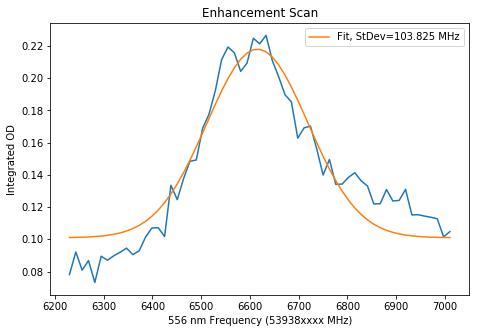

In [12]:
f=freq2
s=scan2
params5 = fitGaussian(f, s,guess=[100,6500,0.22,0],sigma=None)
plt.figure(figsize=(7.5,5))
plt.plot(f,s)
plt.plot(f,gaussian(np.array(f),*params5),label='Fit, StDev={} MHz'.format(params5[0]))
plt.title('Enhancement Scan')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated OD')
plt.legend(loc='best');

In [7]:
folder = '20190220'
start = 361
stop = 431
skips = []
dataset = calculateSeriesODFromRaw(folder,start,stop,skips)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

71
71
49.05368661880493  sec
0.0
6980.0
0.7007904052734375
6970.013951508013
1.401494026184082
6960.029139666597
2.1022844314575195
6950.04309117461
2.8030753135681152
6940.057035887839
3.503779411315918
6930.07221725164
4.204569339752197
6920.0861755544365
4.905359745025635
6910.100127062449
5.6061506271362305
6900.114071775678
6.306854724884033
6890.129253139479
7.0076446533203125
6880.143211442275
7.70843505859375
6870.157162950288
8.409139156341553
6860.172344314089
9.109930038452148
6850.186289027318
9.810719966888428
6840.2002473301145
10.511510372161865
6830.214198838127
11.212214469909668
6820.229380201928
11.913005352020264
6810.243324915157
12.613795280456543
6800.257283217953
13.31458568572998
6790.271234725966
14.015289783477783
6780.286416089767
14.71608018875122
6770.30036759778
15.4168701171875
6760.314325900576
16.11757469177246
6750.329500469594
16.81836462020874
6740.34345877239
17.519155502319336
6730.357403485619
18.219945430755615
6720.371361788415
18.9206500053405

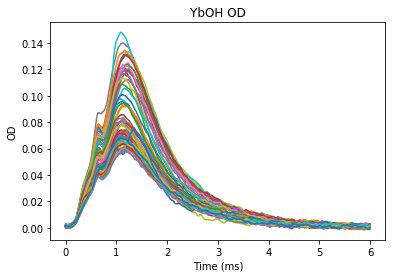

In [8]:
#data = analysis.processScan(dataset,[0,5])
#int_YbOH = data[0]
#time = data[1]
#ODs = data[2]

data = processScan(dataset,[0,6])
scan3 = data[0]
time = data[2]
deltat = time[-1] #sec
print(deltat, ' sec')
start = 6980 #MHz
stop = 6281 #MHz
speed = (stop-start)/deltat
if speed < 0:
    reorder = True
else:
    reorder = False
freq = []
for point in time:
    value = start + point*speed
    print(point)
    print(value)
    freq.append(value)
#if reorder:
#    freq = freq[::-1]
freq3 = freq

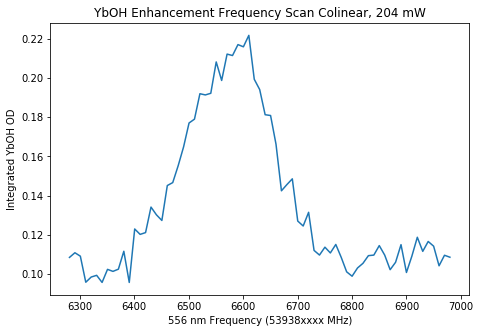

In [9]:
plt.figure(figsize=(7.5,5))
plt.title('YbOH Enhancement Frequency Scan Colinear, 204 mW')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated YbOH OD')
plt.plot(freq3,scan3)

Standard Dev =  75.33247589457156
Covariance matrix = 
 [[ 4.82439409e+00  3.78386174e-04 -1.38348206e-03 -1.48937865e-03]
 [ 3.78386174e-04  3.37003628e+00  2.89015885e-07 -3.94934647e-07]
 [-1.38348206e-03  2.89015885e-07  6.05414788e-06 -1.07963571e-06]
 [-1.48937865e-03 -3.94934647e-07 -1.07963571e-06  1.52525934e-06]]
Fit error =  [2.196e+00 1.836e+00 2.000e-03 1.000e-03]
FIT PARAMS =  [7.533200e+01 6.577211e+03 1.090000e-01 1.060000e-01]



Mean = 6577.211 +/- 1.836 MHz, StDev = 75.332 +/- 2.196 MHz


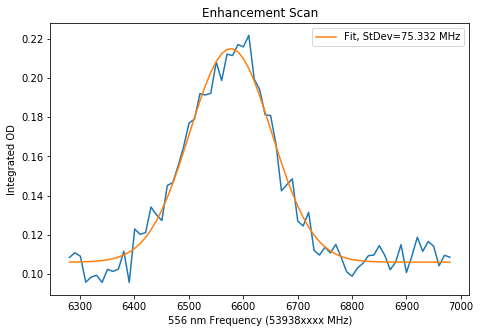

In [11]:
f = freq3
s = scan3
params5 = fitGaussian(f, s,guess=[100,6500,0.22,0],sigma=None)
plt.figure(figsize=(7.5,5))
plt.plot(f,s)
plt.plot(f,gaussian(np.array(f),*params5),label='Fit, StDev={} MHz'.format(params5[0]))
plt.title('Enhancement Scan')
plt.xlabel('556 nm Frequency (53938xxxx MHz)')
plt.ylabel('Integrated OD')
plt.legend(loc='best');

In [1]:
for i in range(1):
    print(i)

0
